In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb

In [33]:
train = pd.read_csv('data/train_features.csv')
train_label = pd.read_csv('data/train_labels.csv')
test = pd.read_csv('data/test_features.csv')
submission = pd.read_csv('data/sample_submission.csv')

In [3]:
def plot_acc_id(df, id_num):
    return df.query('id == @id_num')[['time', 'acc_x', 'acc_y', 'acc_z']].plot(x = 'time')

def plot_gy_id(df, id_num):
    return df.query('id == @id_num')[['time', 'gy_x', 'gy_y', 'gy_z']].plot(x = 'time')

(-1.5, 1.5)

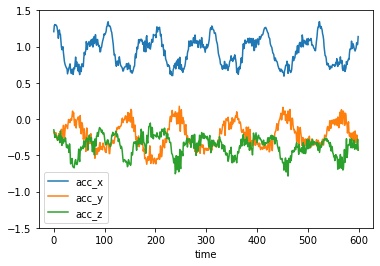

In [4]:
plot_acc_id(train, 0)
plt.ylim((-1.5, 1.5))

(-1.5, 1.5)

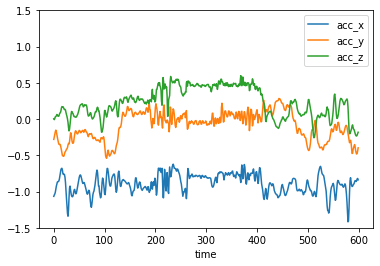

In [5]:
plot_acc_id(train, 3)
plt.ylim((-1.5, 1.5))

#### 데이터 전처리

In [58]:
features = ['id', 'acc_x', 'acc_y', 'acc_z', 'gy_x', 'gy_y', 'gy_z']
X_train = train[features].groupby('id').agg(['max', 'min', 'mean'])
X_test = test[features].groupby('id').agg(['max', 'min', 'mean'])
print(X_train.shape, X_test.shape)

(3125, 18) (782, 18)


In [59]:
y_train = train_label['label']
print(y_train.shape)

(3125,)


#### 모델링

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
model = RandomForestClassifier(n_jobs=-1, random_state=0, min_samples_leaf=30)
model2 = GradientBoostingClassifier(random_state=0, min_samples_leaf=30)

In [64]:
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=30, n_jobs=-1, random_state=0)

In [67]:
#coding: utf-8 
model2.fit(X_train, y_train)

GradientBoostingClassifier(min_samples_leaf=30, random_state=0)

In [10]:
y_pred = model.predict_proba(X_test)
y_pred

array([[0.00046875, 0.        , 0.0096776 , ..., 0.09720249, 0.        ,
        0.02924994],
       [0.00502501, 0.00017857, 0.00098451, ..., 0.00123188, 0.00032595,
        0.00454584],
       [0.00524984, 0.07220313, 0.00509058, ..., 0.        , 0.04459276,
        0.00616755],
       ...,
       [0.00682702, 0.        , 0.        , ..., 0.        , 0.00017544,
        0.00321907],
       [0.00062681, 0.01144735, 0.00271885, ..., 0.00111111, 0.00011494,
        0.00218582],
       [0.00422952, 0.        , 0.000404  , ..., 0.        , 0.        ,
        0.00359837]])

In [11]:
submission.iloc[:,1:] = y_pred
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0.000469,0.000000,0.009678,0.004174,0.000556,0.000000,0.000417,0.000682,0.002358,...,0.026422,0.001749,0.026730,0.001923,0.006362,0.001066,0.006539,0.097202,0.000000,0.029250
1,3126,0.005025,0.000179,0.000985,0.011026,0.005900,0.004217,0.000000,0.002306,0.000822,...,0.003941,0.000000,0.004798,0.000465,0.002357,0.001721,0.007898,0.001232,0.000326,0.004546
2,3127,0.005250,0.072203,0.005091,0.007657,0.001735,0.017769,0.044486,0.026042,0.013385,...,0.000000,0.000000,0.000250,0.032604,0.017082,0.135941,0.000000,0.000000,0.044593,0.006168
3,3128,0.007719,0.011906,0.024395,0.007141,0.000000,0.008391,0.000979,0.010883,0.001820,...,0.000280,0.000000,0.000290,0.001923,0.018211,0.003818,0.012675,0.000261,0.000000,0.029790
4,3129,0.005560,0.000000,0.000000,0.001394,0.003414,0.002681,0.000000,0.000000,0.002771,...,0.000000,0.000000,0.000167,0.000000,0.000000,0.000196,0.002437,0.000323,0.000372,0.000944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0.001869,0.000123,0.000000,0.005676,0.056134,0.039877,0.001075,0.005149,0.001816,...,0.002635,0.000000,0.001964,0.000000,0.000116,0.007357,0.001869,0.000000,0.006053,0.001033
778,3903,0.003716,0.000000,0.000000,0.001131,0.002803,0.004030,0.000625,0.000392,0.001658,...,0.000200,0.000000,0.000000,0.000000,0.000000,0.002435,0.000621,0.000000,0.001330,0.000000
779,3904,0.006827,0.000000,0.000000,0.000927,0.002121,0.000464,0.000000,0.000135,0.001369,...,0.000167,0.000000,0.000526,0.000000,0.001367,0.000000,0.003379,0.000000,0.000175,0.003219
780,3905,0.000627,0.011447,0.002719,0.001328,0.000000,0.000419,0.173713,0.005677,0.006515,...,0.001620,0.000000,0.001766,0.035451,0.009887,0.006617,0.000000,0.001111,0.000115,0.002186


In [12]:
submission.to_csv('baseline_rf.csv', index=False)

In [68]:
y_preds = model2.predict_proba(X_test)
submission = pd.read_csv('data/sample_submission.csv')
submission.iloc[:,1:] = y_preds
submission.to_csv('GradientBoostingClassifier.csv', index=False)

---

## 앙상블
- bagging, boosting, stacking

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from string import ascii_lowercase
from itertools import combinations

import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import  GradientBoostingClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
import numpy as np

In [56]:
X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6])
y = train_label['label']
#y = tf.keras.utils.to_categorical(train_label['label']) 
print(X.shape, y.shape)

(3125, 600, 6) (3125,)


In [51]:
k_fold = KFold(n_splits = 3, shuffle = True, random_state = 0)

In [52]:
clf1 = RandomForestClassifier(n_estimators=500)
clf2 = LGBMClassifier()
#clf3 = GradientBoostingClassifier()
#soft_vote  = VotingClassifier([('r1',clf1), ('r2', clf2), ('r3',clf3)], voting='soft')
#soft_vote.fit(X, y)

In [57]:
clf2.fit(X, y)

ValueError: Found array with dim 3. Estimator expected <= 2.